# Grade: 100 points

# Assignment 01: Linear Regression

In this assignment, you're going to write your own methods to fit a linear model.  

## Instructions

#### Follow These Steps before submitting your assignment 
1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit your completed notebook to OWL by the deadline.


This notebook contains the questions for Assignment 1. Make sure to complete this assignment individually and appropriately reference all external code and documentation used. 

## Data set 

For this assignment, we will examine some data representing possums. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## Part 1 - Simple Linear Regression

### Question 1.1  (10 points)


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. You might want to add an `alpha` in case some data are overlapping. 

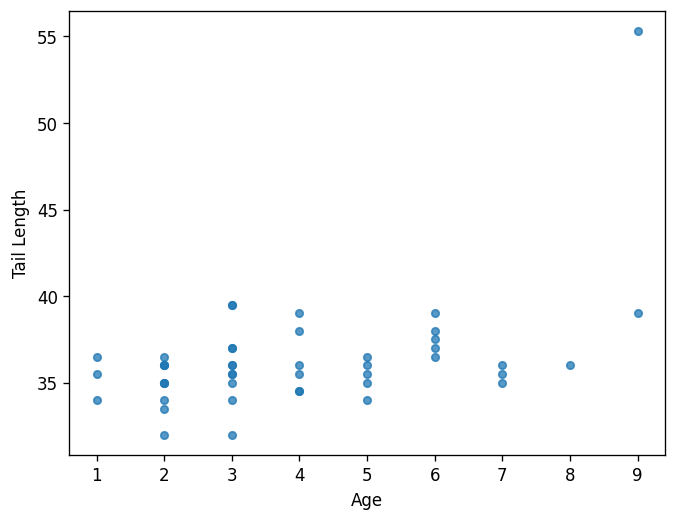

In [2]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')

# Make the scatter plot (don't forget the axis labels)
fig, ax = plt.subplots(dpi=120)

possum_data.plot(x='age', y='tailL', kind='scatter', alpha=0.75, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')
plt.show()

### Question 1.2: (5 point)

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\beta$ are coefficients, and $\mathbf{y}$ are outcomes.  
1. Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

2. Test the function by setting the following values and call your function with these values!

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
 

3. Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [3]:
def linearModelPredict(b,X):
    yp = X @ b
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

# Test
print(linearModelPredict(b,X))

[ 0.1 -0.2  0.7]


In [4]:
# By the way: What happens when b is a 2d-array?
# b can either be a 1d or 2d array and the multiplication will still work
# This requires you to have knowledge about shapes and keep track of the dimension.
print('Using a 1d array for b')
X = np.eye(2)
b = 2 * np.ones(2)
print("X@b:", linearModelPredict(b,X))

print('Using a 2d array for b')
X = np.eye(2)
b = 2 * np.ones(2).reshape(-1,1)
print("X@b:", linearModelPredict(b,X))

Using a 1d array for b
X@b: [2. 2.]
Using a 2d array for b
X@b: [[2.]
 [2.]]


### Question 1.3 (15 points)

1. Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

2. Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

3. Report `RSS` and `gradient`. 


In [5]:
def linearModelLossRSS(beta,X,y):
    predY = linearModelPredict(beta,X)
    res = y - predY
    
    RSS = sum(res**2)
    gradient = -2 * (res @ X)
    
    return RSS, gradient
    
# Test
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

rss, grad = linearModelLossRSS(b,X,y)
print('RSS:', rss)
print('Gradient:', grad)

RSS: 2.06
Gradient: [-3.6 -4. ]


4. To minimize the cost do you need increase or decrease the value of the parameters? 

(Write the answer in the cell below)

Written answer: The gradient is negative for both parameters, therefore both paramaters need to be increased in order to minimize the cost.

### Question 1.4  (15 points) 

Now that you've implemented a loss function in Question 1.3, it is now time to minimize it!

1. Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

2. Test the function with these values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

3. Report `best parameters` (best beta's) and `the R2`value.


In [6]:
def linearModelFit(X,y,lossfcn=linearModelLossRSS):
    rows, cols = X.shape
    betas = np.zeros(cols)
    RES = so.minimize(lossfcn,betas,args=(X,y),jac=True)
    pred_betas = RES.x
    
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS, grad = linearModelLossRSS(pred_betas,X,y)
    R2 = 1 - (RSS/TSS)
    
    return pred_betas, R2

# Test
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

est_b, R2= linearModelFit(X,y)
print('Estimated betas:', est_b)
print('R2:', R2)

Estimated betas: [0.6 0.6]
R2: 0.75


### Question 1.5 (15 points)

1. Use the above functions to fit your model to the possum data. 
2. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

3. Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). 
4. Also report the `R2` value for the fit. 


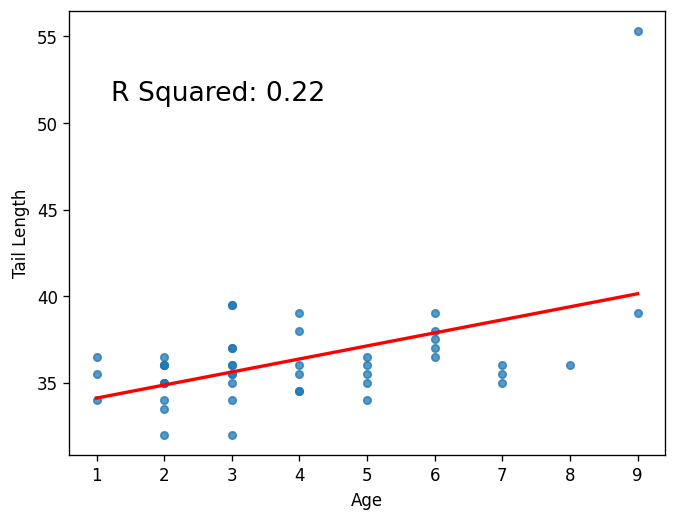

In [7]:
# Make the design matrix using np.c_ 
y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X =  np.c_[np.ones(N), age]

# Call you fitting function 
betas, R2 = linearModelFit(X,y)

# Create the scatter plot (see question 1.1)
fig, ax = plt.subplots(dpi=120)

possum_data.plot(x='age', y='tailL', kind='scatter', alpha=0.75, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')

# Create a new X matrix with equally space data 
age_grid = np.linspace(age.min(),age.max(),10)
Xn = np.c_[np.ones(age_grid.size), age_grid]
yn = linearModelPredict(betas,Xn)
# Add the line to the graph 
ax.plot(age_grid,yn,"r-", linewidth=2, label="Predictions")
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)), 
            xy=(0.25, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)
plt.show()
# Report R2 

## Part 2 - LAD Regression

### Question 2.1 (15 points)

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with `least absolute deviation` loss.

1. Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

2. Test the function with these values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

3. Report `RSS` and `gradient`. 

In [8]:
def linearModelLossLAD(beta,X,y):
    yp = linearModelPredict(beta,X)
    res = y - yp
    sres = np.sign(res)
    sum_abs_dev = sum(abs(res))
    grad = -(sres @ X)
    
    return sum_abs_dev, grad

# Test
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
lad, grad = linearModelLossLAD(b,X,y)
print('LAD:', lad)
print('Gradient:', grad)

LAD: 2.0
Gradient: [-1. -1.]


### Question 2.2 (10 points)


1. Use the above functions to fit your LAD model. 
2. Use your model to make predictions along a grid of equally spaced possum ages.  
3. Once fit, add the fitted line to the scatter plot as in Question 1.5.  
4. Also report the `R2` value. 


*Note*: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimiers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



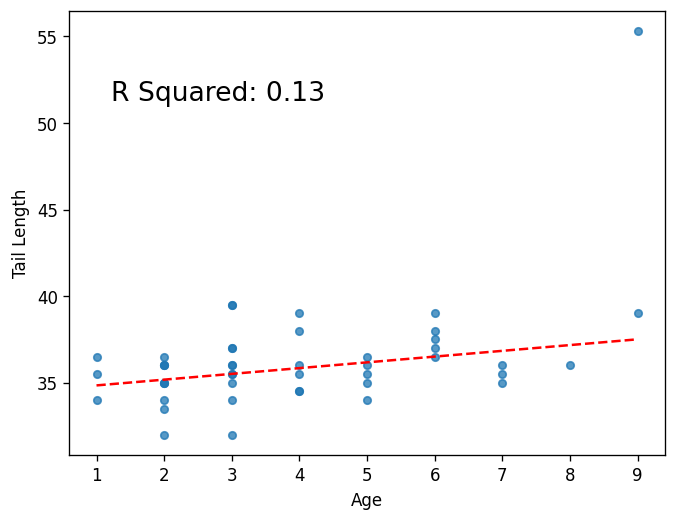

In [9]:
# Make the design matrix using np.c_ 
y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X =  np.c_[np.ones(N), age]

# Call you fitting function 
betas, R2 = linearModelFit(X,y,lossfcn=linearModelLossLAD)

# Plot
age_grid = np.arange(age.min(), age.max()+1)
Xn = np.c_[np.ones(age_grid.size), age_grid]
yn = linearModelPredict(betas, Xn)

fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x='age', y='tailL', alpha=0.75, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')

ax.plot(age_grid, yn, color = 'red', linestyle = 'dashed')
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)), 
            xy=(0.25, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)
plt.show()

5. What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

(Write the answer in the cell below)


Written answer: The LAD fit does not give as much weight to the outlier as the OLS fit. The R2 value is lower because OLS minimized the RSS in order to maximize the value of R2.

### Question 2.3 (15 points)

1. Fit both an `OLS model` and a `LAD model` with `statsmodels`.  


OLS R2: 0.22
LAD R2: nan


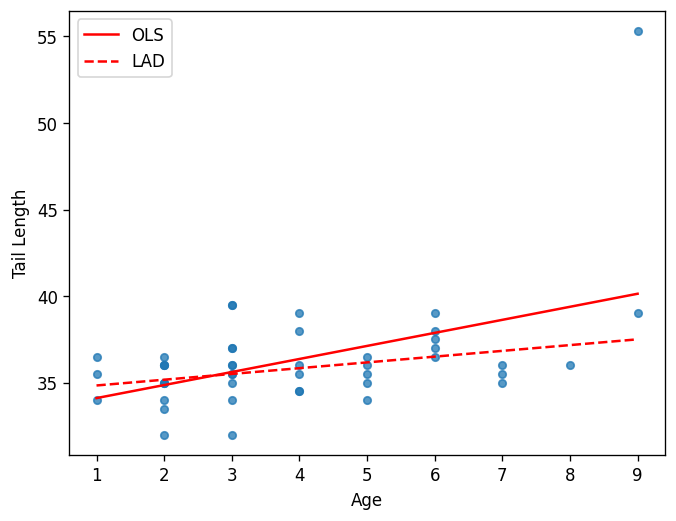

In [10]:
ols_fit = smf.ols('tailL~age',data=possum_data).fit()
lad_fit = smf.quantreg('tailL~age',data=possum_data).fit(q=0.5)

print('OLS R2:', ols_fit.rsquared.round(2))
print('LAD R2:', lad_fit.rsquared)

age = np.linspace(1,9,101)
new_df = pd.DataFrame({'age':age})
y_ols = ols_fit.predict(new_df).values
y_lad = lad_fit.predict(new_df).values

fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', y ='tailL', ax = ax, alpha = 0.75)
ax.plot(age, y_ols, color = 'red', label = 'OLS')
ax.plot(age, y_lad, color = 'red', linestyle = 'dashed', label = 'LAD')
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')
ax.legend()
plt.show()

In no more than two sentences, comment on the rsquared values from `statsmodels` and the rsquared values from your models. Are they similar?

(Write the answer in the cell below)

Written answer: For OLS the r squared values were the same, however the r squared values for the LAD models were quite different (0.13 / nan). Although the values are not similar, for LAD models the r squared values are not the best ways to determine if they are effective.